In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
df=pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [174]:
df.shape

(1000, 16)

In [175]:

df.describe()


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [176]:
df.columns


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [178]:
display(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [179]:
df.dropna(inplace=True)
df.drop('Poster_Link', axis=1,inplace=True)
df.shape

(714, 15)

In [180]:
df = df.drop(df[df['Released_Year'] == 'PG'].index)
np.sort(df['Released_Year'].unique())

array(['1930', '1931', '1933', '1934', '1936', '1938', '1939', '1940',
       '1941', '1942', '1944', '1946', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'], dtype=object)

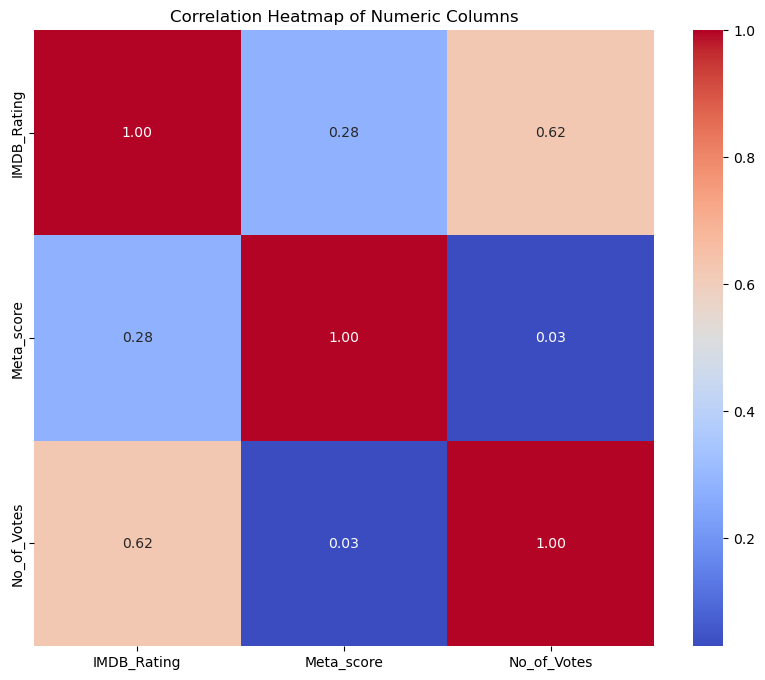

In [181]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

1.1893924163905378


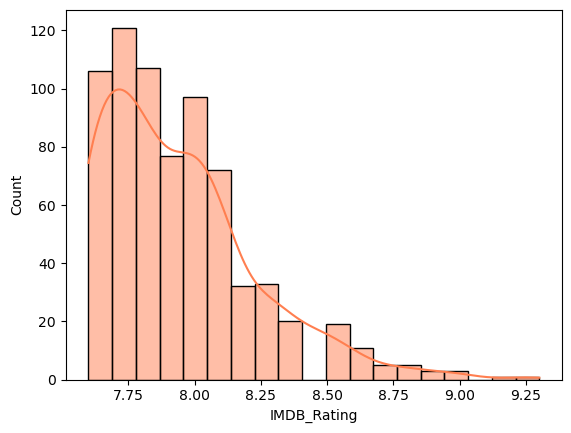

In [182]:
sns.histplot(x='IMDB_Rating',data=df,kde=True,color='coral')
print(df['IMDB_Rating'].skew())

0.0


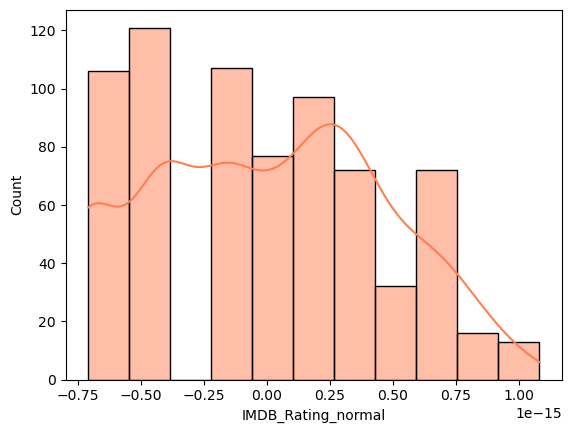

In [183]:
pt = PowerTransformer(method='yeo-johnson')
df['IMDB_Rating_normal'] = pt.fit_transform(df[['IMDB_Rating']])
sns.histplot(x='IMDB_Rating_normal',data=df,kde=True,color='coral')
print(df['IMDB_Rating_normal'].skew())


-0.5855411164632158


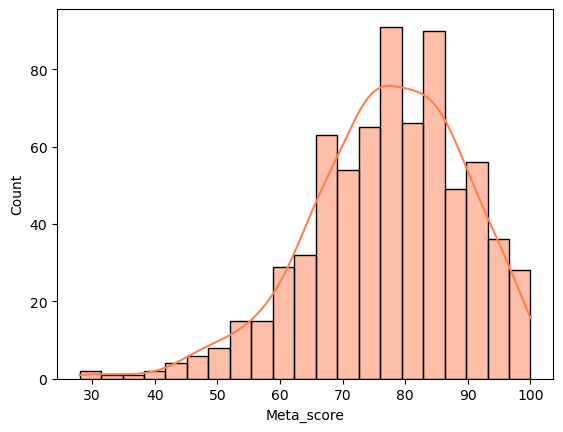

In [184]:
sns.histplot(x='Meta_score',data=df,kde=True,color='coral')
print(df['Meta_score'].skew())

-0.049832569882758346


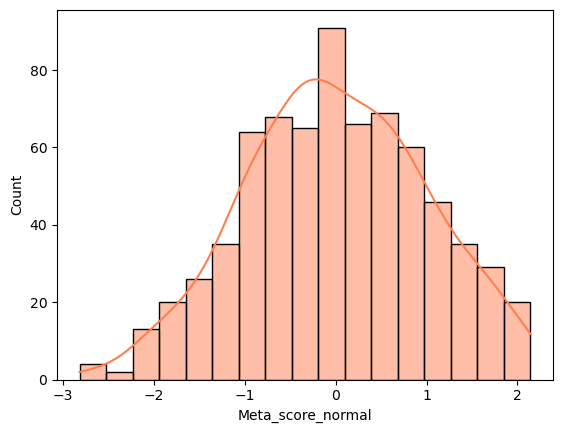

In [185]:
pt = PowerTransformer(method='yeo-johnson')
df['Meta_score_normal'] = pt.fit_transform(df[['Meta_score']])
sns.histplot(x='Meta_score_normal',data=df,kde=True,color='coral')
print(df['Meta_score_normal'].skew())

1.928648413779229


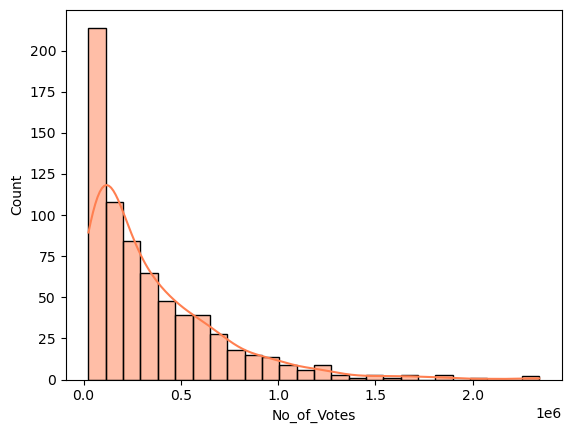

In [186]:
sns.histplot(x='No_of_Votes',data=df,kde=True,color='coral')
print(df['No_of_Votes'].skew())

-0.02028265359882397


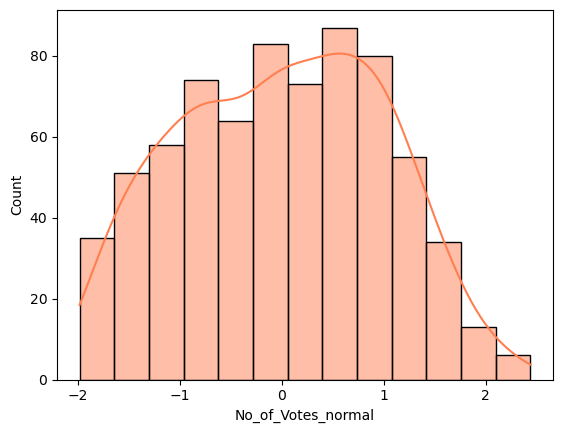

In [187]:
pt = PowerTransformer(method='yeo-johnson')
df['No_of_Votes_normal'] = pt.fit_transform(df[['No_of_Votes']])
sns.histplot(x='No_of_Votes_normal',data=df,kde=True,color='coral')
print(df['No_of_Votes_normal'].skew())

2.9302543321462102


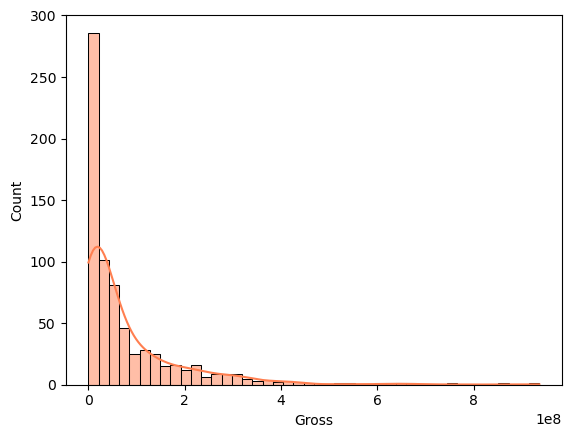

In [188]:
df['Gross'] = df['Gross'].replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
sns.histplot(x='Gross',data=df,kde=True,color='coral')
print(df['Gross'].skew())

-0.07756427478366354


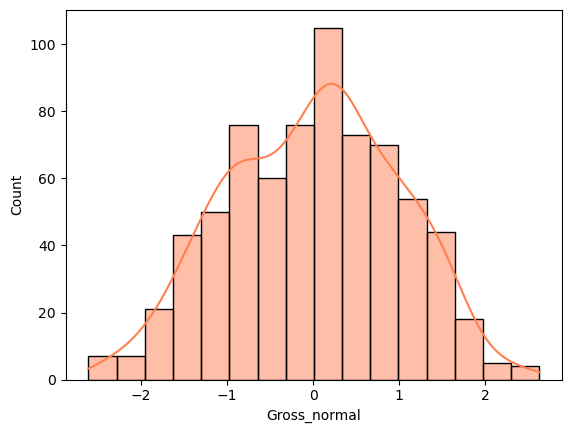

In [189]:
pt = PowerTransformer(method='yeo-johnson')
df['Gross_normal'] = pt.fit_transform(df[['Gross']])
sns.histplot(x='Gross_normal',data=df,kde=True,color='coral')
print(df['Gross_normal'].skew())

In [190]:
df['Runtime'] = df['Runtime'].replace('min', '', regex=True)
print(df['Runtime'].skew())

1.0112597413916702


0.009593371401678128


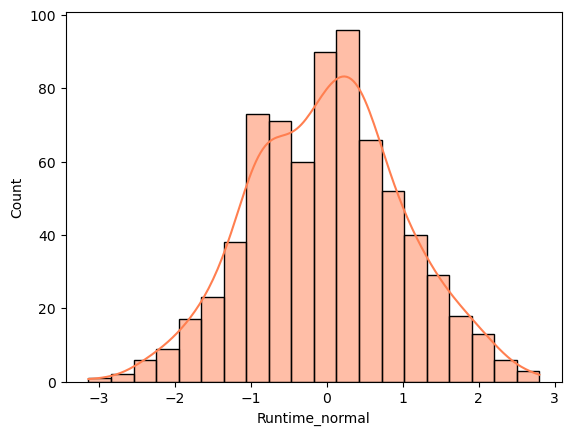

In [191]:
pt = PowerTransformer(method='yeo-johnson')
df['Runtime_normal'] = pt.fit_transform(df[['Runtime']])
sns.histplot(x='Runtime_normal',data=df,kde=True,color='coral')
print(df['Runtime_normal'].skew())

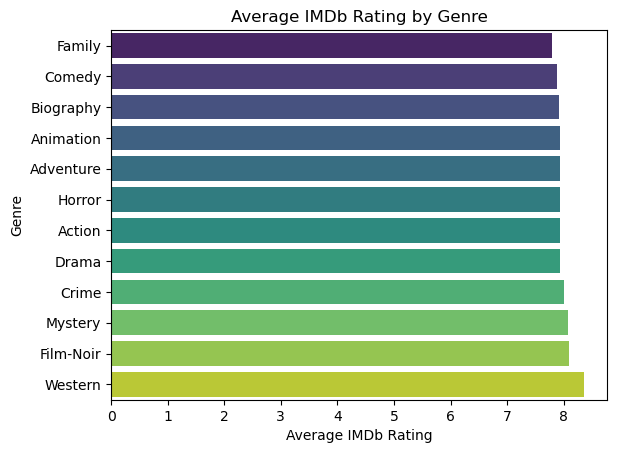

In [192]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
genre_rating = df.groupby('Main_Genre')['IMDB_Rating'].mean().sort_values().reset_index()
sns.barplot(data=genre_rating,x='IMDB_Rating',y='Main_Genre',hue='Main_Genre',palette='viridis')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.show()

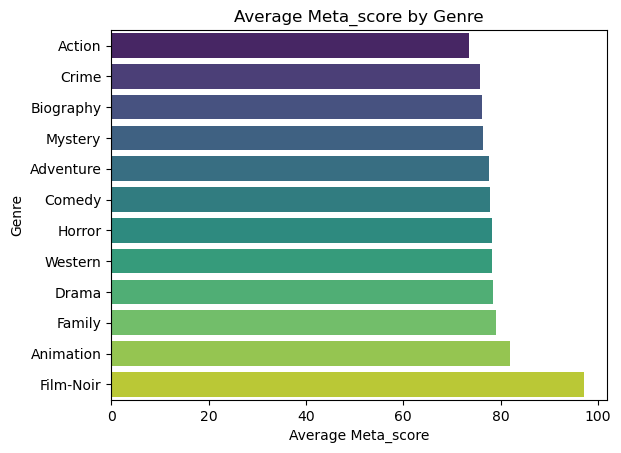

In [193]:
genre_rating = df.groupby('Main_Genre')['Meta_score'].mean().sort_values().reset_index()
sns.barplot(data=genre_rating,x='Meta_score',y='Main_Genre',hue='Main_Genre',palette='viridis')
plt.title('Average Meta_score by Genre')
plt.xlabel('Average Meta_score')
plt.ylabel('Genre')
plt.show()

In [194]:
df['Released_Year']=df['Released_Year'].astype(int)
conditions = [
    (df['Released_Year'] >= 1920) & (df['Released_Year'] <= 1940),
    (df['Released_Year'] > 1940) & (df['Released_Year'] <= 1960),
    (df['Released_Year'] > 1960) & (df['Released_Year'] <= 1980),
    (df['Released_Year'] > 1980) & (df['Released_Year'] <= 2000),
    (df['Released_Year'] > 2000) & (df['Released_Year'] <= 2020)
]
values = [1, 2, 3, 4, 5]
df['year_group'] = np.select(conditions, values, default=0)

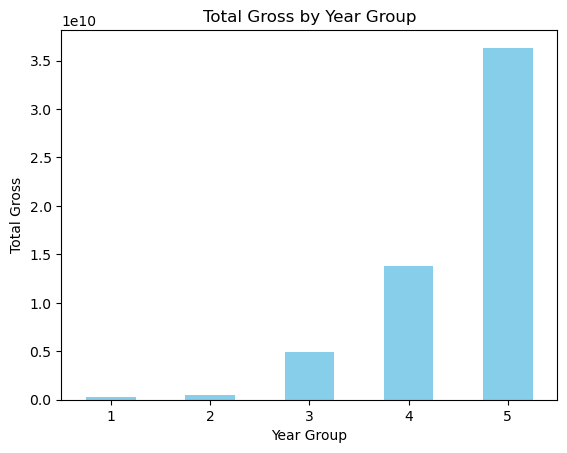

In [195]:
df.groupby('year_group')['Gross'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Gross by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Total Gross')
plt.xticks(rotation=0)
plt.show()

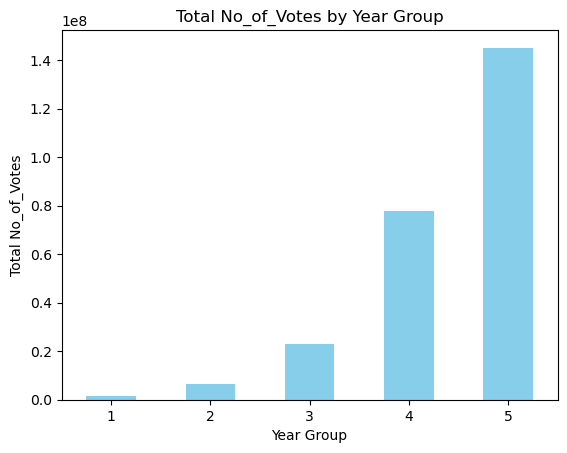

In [196]:
df.groupby('year_group')['No_of_Votes'].sum().plot(kind='bar', color='skyblue')
plt.title('Total No_of_Votes by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Total No_of_Votes')
plt.xticks(rotation=0)
plt.show()

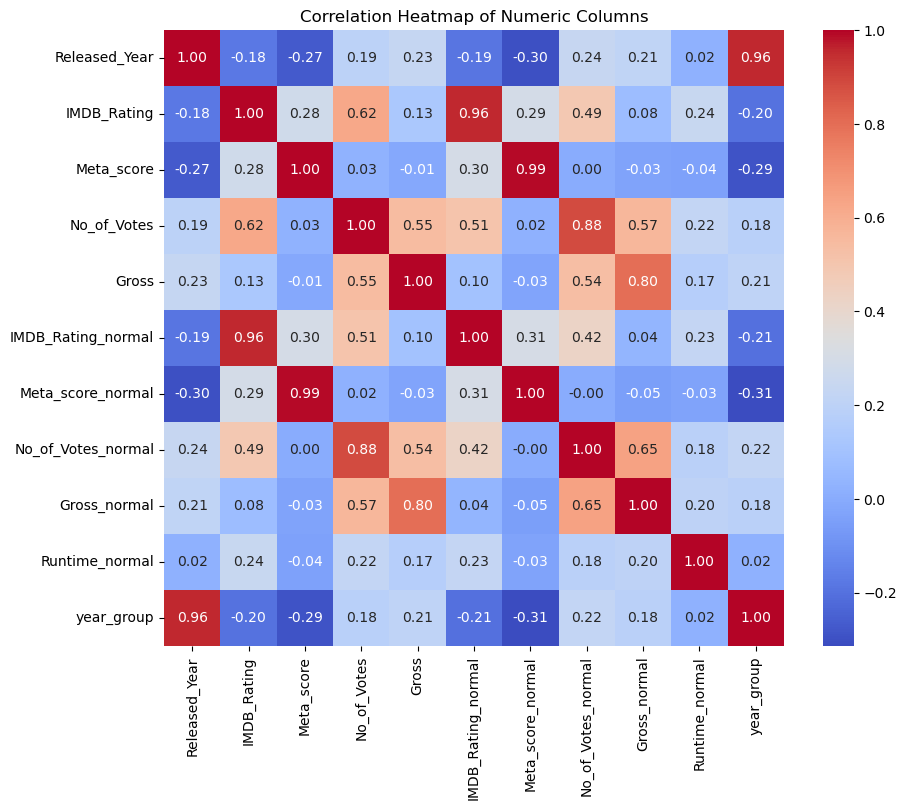

In [197]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()